

### **Análise de Otimizadores no Perceptron Simples**

Você está trabalhando com o dataset **Breast Cancer Wisconsin**, que já está carregado e dividido em `X_train`, `X_test`, `y_train`, `y_test`. Sua tarefa é analisar o impacto de diferentes otimizadores no desempenho de um Perceptron Simples.


1. **Estruture o modelo de Perceptron Simples**:
   - Use a biblioteca Keras ou TensorFlow.
   - Configure o modelo com:
     - Uma camada densa de entrada que corresponda ao número de features do dataset.
     - Uma única camada densa de saída com **1 unidade** e ativação `sigmoid` (para classificação binária).
   
2. **Varie o otimizador**:
   - Treine o modelo usando **três otimizadores diferentes**:
     - **SGD (Stochastic Gradient Descent)**
     - **Adam**
     - **RMSprop**
   - Para cada otimizador, utilize:
     - Função de perda: `binary_crossentropy`.
     - Número de épocas: 20.
     - Tamanho do batch: 32.

3. **Avalie o modelo**:
   - Para cada treinamento, registre a **acurácia no conjunto de teste** usando o método `.evaluate()`.

4. **Visualize os resultados**:
   - Plote um **gráfico de barras horizontal**, onde:
     - O eixo Y exiba os nomes dos otimizadores (`SGD`, `Adam`, `RMSprop`).
     - O eixo X mostre a acurácia obtida com cada otimizador.



In [7]:
# Importações das bibliotecas
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Comentário:
# Nesta célula, importamos as bibliotecas necessárias para criar e treinar o modelo,
# assim como para plotar o gráfico final.


In [8]:
# Carregando o Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X_cancer = breast_cancer.data
y_cancer = breast_cancer.target
# Pré-processamento
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

# Divisão de dados
X_train, X_test, y_train, y_test = train_test_split(X_cancer_scaled, y_cancer, test_size=0.3, random_state=42)

In [9]:
# Lista de otimizadores para teste
optimizers = [("SGD", SGD()), ("Adam", Adam()), ("RMSprop", RMSprop())]

# Lista para armazenar os resultados de acurácia
results = []

# Comentário:
# Definimos os otimizadores que serão testados: SGD, Adam e RMSprop.
# Também inicializamos uma lista vazia para salvar os resultados (nome do otimizador e sua acurácia).


In [10]:
# Loop para treinar o modelo com diferentes otimizadores
for name, optimizer in optimizers:
    # Definindo o modelo
    model = Sequential([
        Dense(30, activation='relu', input_shape=(X_train.shape[1],)),  # Camada densa com 30 neurônios
        Dense(1, activation='sigmoid')  # Camada de saída com ativação sigmoid
    ])

    # Compilando o modelo com o otimizador atual
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Treinando o modelo (20 épocas, batch size = 32)
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Avaliando o modelo no conjunto de teste
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Armazenando os resultados (nome do otimizador e acurácia)
    results.append((name, accuracy))

# Comentário:
# Este loop treina o modelo para cada otimizador na lista. O modelo tem uma camada densa com
# 30 neurônios e ativação ReLU, e a camada de saída usa a ativação sigmoid para classificação binária.
# A função de perda usada é binary_crossentropy.


c:\Users\IvoAg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Ordenando os resultados pela acurácia, do maior para o menor
results = sorted(results, key=lambda x: x[1], reverse=True)

# Separando os nomes dos otimizadores e suas acurácias
names, accuracies = zip(*results)

# Comentário:
# Organizamos os resultados para que fiquem em ordem decrescente de acurácia,
# facilitando a interpretação do gráfico que será gerado.


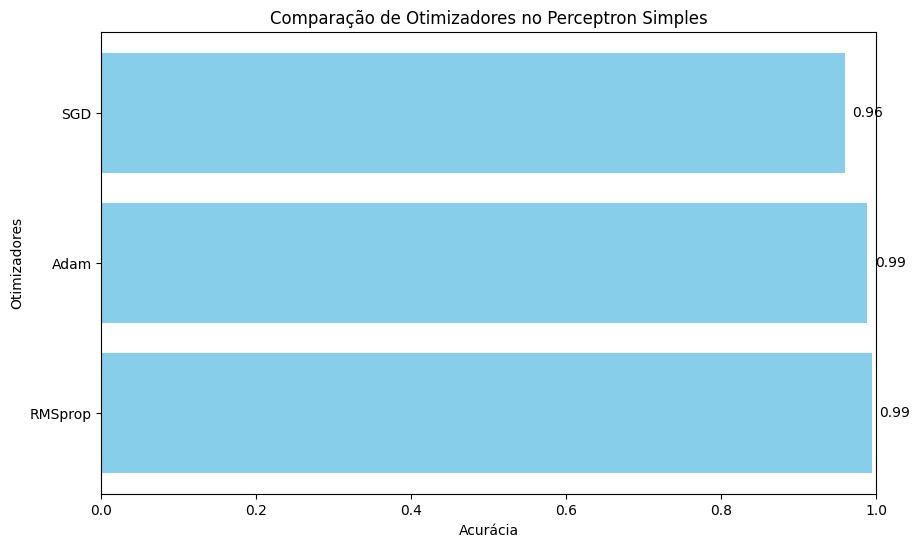

In [12]:
# Configuração do gráfico
plt.figure(figsize=(10, 6))
plt.barh(names, accuracies, color='skyblue')  # Gráfico de barras horizontal
plt.xlabel('Acurácia')
plt.ylabel('Otimizadores')
plt.title('Comparação de Otimizadores no Perceptron Simples')
plt.xlim(0, 1)  # Escala de acurácia entre 0 e 1

# Exibindo valores de acurácia diretamente no gráfico
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

# Exibindo o gráfico
plt.show()

# Comentário:
# Nesta célula, criamos o gráfico de barras horizontal para comparar os otimizadores.
# Cada barra representa a acurácia alcançada por um otimizador, com os valores exibidos ao lado.
